# **实例：泰坦尼克幸存者预测**

In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

**导入数据集，探索数据**

In [6]:
data = pd.read_csv(r'C:\MyProgram\pycharm\jupyter\datasets\titanic\train.csv', encoding='utf-8-sig')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 分类器只能处理数值型，所以对于数据集中的字符型，必须经过处理
* 缺失值也需要进行处理

**筛选特征**

* 显然乘客的姓名、票号、舱给出的是舱号(而不是几等舱，因此用处不大)对于预测来说是无用信息，可以剔除
* 对于缺失值太多的列，也可以剔除

In [11]:
data.drop(["Name", "Ticket", "Cabin"], inplace=True, axis=1)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


**处理缺失值**

In [13]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Embarked缺失值较少，可以直接删除

In [15]:
data = data.dropna(axis=0)

**处理object类型**

In [24]:
# 查看某列有几个取值
labels = data['Embarked'].unique().tolist()
data.loc[:, 'Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))

* 对于字符型不包含大小含义的列可以用这种方式进行转化，但需要转化的最好控制在10个以内
* 对于小学、初中、高中、大学这类有顺序的分类型变量，需要进一步思考

In [23]:
data.loc[:, 'Sex'] = (data['Sex'] == 'male').astype('int')

**分割特征、目标值**

In [26]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [27]:
x = data.iloc[:, data.columns != 'Survived']

In [28]:
y = data.iloc[:, data.columns == 'Survived']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [34]:
x_train  # 乱序
x_train.shape

(622, 8)

对乱序的数据集最好排好序

In [35]:
for i in [x_train, x_test, y_train, y_test]:
    i.index = range(i.shape[0])

In [36]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,883,3,0,22.000000,0,0,10.5167,0
1,643,3,0,2.000000,3,2,27.9000,0
2,732,3,0,11.000000,0,0,18.7875,1
3,29,3,0,29.699118,0,0,7.8792,2
4,8,3,0,2.000000,3,1,21.0750,0
...,...,...,...,...,...,...,...,...
617,167,1,0,29.699118,0,1,55.0000,0
618,556,1,0,62.000000,0,0,26.5500,0
619,61,3,0,22.000000,0,0,7.2292,1
620,249,1,0,37.000000,1,1,52.5542,0


**建立模型**

In [48]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

In [49]:
score

0.6479400749063671

结果不理想，可能是因为选择的切分方式导致数据不理想，可以用交叉验证在整体数据集上检测一下模型的准确性

In [43]:
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf, x, y, cv=10).mean()
score

0.5995020429009192

结果不理想，尝试调参

* max_depth

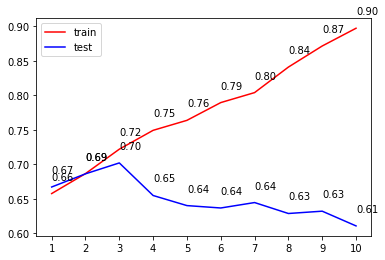

In [65]:
tr = []
te = []

for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                # ,criterion='entropy'
                                )
    clf = clf.fit(x_train, y_train)
    score_tr = clf.score(x_train, y_train)
    score_te = cross_val_score(clf, x, y, cv=10).mean() 
    
    tr.append(score_tr)
    te.append(score_te)

# 画图
plt.plot(range(1,11), tr, c='red', label='train')
plt.plot(range(1,11), te, c='blue', label='test')
for i in range(1,11):
    plt.text(i, tr[i-1]+0.02, '%.2f'%tr[i-1])
    plt.text(i, te[i-1]+0.02, '%.2f'%te[i-1])    
plt.xticks(range(1,11))
plt.legend()
plt.show()

在画图前，我们可以知道。如果训练集的得分远远高出测试集得分，可以知道模型过拟合，需要进行剪枝等操作；如果训练集表现不好，测试集表现很好，那么模型应该是欠拟合的；

发现在3层时，达到一个峰值，这时把criterion改为entropy尝试，果然失败了，entropy一般用于模型欠拟合时

接着调参,我们需要对多个参数进行调试,不可能逐个尝试,接下来尝试网格搜索

**网格搜索**

网格搜索是逐个尝试取值的过程, 因此如果设置的取值范围比较大, 计算量会相当大

In [58]:
import numpy as np
gini_threshold = np.linspace(0, 0.5, 20)


parameters = {'criterion': ['gini', 'entropy']
              ,'splitter': ['best', 'random']
              ,'max_depth': [*range(1,10)]
              ,'min_samples_leaf': [*range(1, 50, 5)]
              ,'min_impurity_decrease': [*np.linspace(0, 0.5, 20)]
}

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS = GS.fit(x_train, y_train)

In [59]:
GS.best_params_  # 从我们输入的参数中，返回最佳的参数组合

{'criterion': 'gini',
 'max_depth': 7,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [64]:
GS.best_score_  # 网格搜索后的评价标准

0.7106246799795188

In [ ]:
网格搜索后得到的结果还没有调参得到的结果好，原因是因为网格搜索的参数必须全部用到，因此在网格搜索和调参之前需要明确使用哪些参数以及参数范围